# Reasoning in Complex Environments with the SelectScript Declarative Language

<u>André Dietrich</u>, Sebastian Zug, Luigi Nardi, and Jörg Kaiser

This tiny little notebook is thought to be used as supplemental material and as presentation slides/demo to the associated publication at 6th International Workshop on Domain-Specific Languages and Models for ROBotic systems [DSLRob-15](http://www.doesnotunderstand.org/public/DSLRob2015 "workshop"). Download the private version at [arxiv.org](http://arxiv.org/abs/1508.04159 "private version").

## Short Overview

* What is SelectScript?
* ... and what is it used for?
* Reasoning?
* Future Work?

If you think of the current programming languages and paradigms as an ecosystem of coexisting species, it might look like the scene from above. Languages have evolved over time from very simple forms to complex ones, which conquered new terrains (fields of application). Thus, ammonites or shells could be interpreted as machine-code or assembly, they existed long before and change only slightly over time. In fact they perform perfectly on their microprocessor niche with fixed inputs and outputs, and small problems. On the other hand the larger plesiosaurs or ichthyosaurs could be interpreted as C++ or Java. They can sustain in different areas and can be used to solve more complex problems than "lower" forms of languages.


But there are also others such as the pterodactyls such as Prolog, OWL and other declarative languages. On the ground they are pretty helpless and vulnerable, but they offer another perspective. Some kinds of problems are much easier to solve in a declarative manner, where you "only" have to describe the goal and some kind of reasoner tries to solve it... Or in other words, getting from $A$ to $B$ might be much easier by using declaration, than the object-oriented or imperative way.

<center>
    <img src="res/teaser.jpg" alt="Teaser" style="width: 700px;"/>
    <font size=1>1834 Guerin Engraving 'extinct Animals</font>
</center>

Thus, the idea of SelectScript was not to develop a new kind of flying dinosaur, but instead to build something much more lightweight ...

<center>
    <img src="res/butterfly.png" alt="Butterfly" style="width: 300px;"/>
    <font size=1>1896 Wyman & Sons 'Cethosia mahratta</font>
</center>

... something that can be attached to different programming languages, allowing them to make use of declaration where it is needed.

<center>
    <img src="res/dino_butterfly.png" alt="SelectScript" style="width: 600px;"/>
    <font size="1">2007 Robert Bakker 'Allosaurus skull</font>
</center>

## Original Niche

By the time, the robotic world models and simulation environments we were applying have become more and more complex and so did our interfaces and analyze functions. Including new functionality while maintaining the existing one had become more and more difficult [4]. So we started to look for new ideas and concepts and came up with a new declarative SQL like query language [1].

As indicated by the picture below, there is no real difference between a database and a simulation from the systems point of view. They can be seen as two sides of a coin, both are used to access and interpret relevant aspects of a system (e.g. meteorology data, status information of a robot, an assembly line, or traffic within a network). A database is commonly used to store certain aspects, whereby a simulation is used to reproduced or foresee them. If you think about it, in most domains you would generally try to reproduce and interpret the data from a simulation, which you would commonly measure within a real system and store in a database.

SQL has evolved as a standard interface to database management systems (DBMS), no matter what type of DBMS is below, information can be extracted with a relatively simple syntax. What do we have to analyze simulations? Plenty of different interfaces for different languages! Whereby SQL itself is not bound to data, it is a declarative language about entities and relations. Therefor we adopted the SQL syntax to abstract information from simulations/world models and added a new feature ... Representations

SelectScript is a lightweight language with a very tiny interpreter, that can be extended quite easily to run on different environments and thus act as an abstract interface. 

<center>
    <img src="res/coherence.png" alt="SelectScript" style="width: 550px;"/>
</center>

## Starting SelectScript for ODE

There are currently two "dialects" available for [SelectScript](https://gitlab.com/OvGU-ESS/SelectScript), next to the basis implementation:

1. [SelectScript_ODE](https://gitlab.com/OvGU-ESS/SelectScript_ODE) for the [Open Dynamics Engine](http://www.ode.org/ "ode")
2. [SelectScript_OpenRAVE](https://gitlab.com/OvGU-ESS/SelectScript_OpenRAVE) for [Open Robotics Automation Virtual Environment](http://openrave.org/docs/latest_stable "openrave")

All sources and additional examples can be downloaded from: https://gitlab.com/groups/OvGU-ESS

This intro-section is used to demonstrate the basic language concepts and the usage in conjunction with [ODE](http://www.ode.org/ "ode"). The code snippet below does only load SelectScript and the interpreter for [ODE](http://www.ode.org/ "ode").

In [1]:
# loading the basic interpreter for ODE
import SelectScript 
import SelectScript_ODE.Interpreter as ssODE 

ssODE = ssODE()

## Simple Operations

A script is defined as a string, which has to be translated into an intermediate representation at first, before it can be evaluated. Every statement in a script must end with a semicolon (;).

In [2]:
expr = """ 2 + 44 * 16^0.5; """
prog = SelectScript.compile(expr)
print ssODE.eval(prog)

178.0


In [3]:
expr = """ True AND False OR True; """
prog = SelectScript.compile(expr)
print ssODE.eval(prog)

True


## Getting Help ...

As it will be shown later, there are no tables, columns, or rows, instead functions are applied. "Functions" and "variables" are used as a basic interface to a simulation. In order to show, which functions were defined to access an environment, the following `help` command can be used.

In [4]:
expr = """ help(); """ 
prog = SelectScript.compile(expr)
print ssODE.eval(prog)

['isRay', 'force', 'help', 'isTransform', 'getTime', 'torque', 'pos', 'collision', 'isHeightfield', 'isCylinder', 'linearVelocity', 'uniq', 'rot', 'id', 'isBox', 'isSphere', 'isPlane', 'isEnabled', 'isSpace', 'to', 'isCCylinder', 'max', 'print', 'isCapsule', 'hasBody', 'gravityMode', 'quat', 'aabb', 'volume', 'var', 'isTriMesh', 'mass', 'count', 'distance', 'obj', 'type', 'clear', 'min', 'posZ', 'posX', 'posY', 'velocity', 'sum', 'isGeom', 'quantum']


This way it is also possible to get additional information about a function and its appropriate usage.

In [5]:
expr = """ help("mass"); """
prog = SelectScript.compile(expr)
print ssODE.eval(prog)

mass
Returns the mass of an object.
Usage: mass(object) -> float


In [6]:
expr = """ help("pos"); """ 
prog = SelectScript.compile(expr)
print ssODE.eval(prog)

pos
Returns a list of the x,y,z coordinates of an object.
Usage: pos(object, begin, end)
       pos(object) -> [x,y,z]
       pos(object, 0,2) -> [x,y]


## Running the Simulation

The following simulation is used as a generic example for ODE, it shows a chaotic but configurable simulation. Objects of different size, shape, color, mass, direction and speed appear within a box, fly around and bump against each other. The more time passes by the more objects will be involved. All the object parameters, their place of appearance are random values, but as listed in the code example below, boarders for these values can be defined manually as well as different probabilities and environment settings. The last line in the code below, shows how this simulation and its data can be made accessible to SelectScript. Referring to the simulation is later done by accessing the SelectSctipt variable "space". That is all that is required, we can start to extract information from the simulation ...

This example is a demo attached to odeViz, a visualization toolkit for ODE, which can be downloaded at: https://gitlab.com/OvGU-ESS/odeViz

In [7]:
from odeViz.examples import chaos
sim = chaos.Simulation(dt=0.01, dx=10)
sim.setParam(seed=18, gravity=(0,0,0), bounce=.3, Mu=500,
             minmaxForce=10000, probExplode=.1, probInsert=.5)
sim.start(iren_start=False)

ssODE.addVariable('space', sim.space[0]) # < attaching

odeViz
VisualizationToolKit (vtk) for the OpenDynamicsEngine

Key-Press-Events
----------------
Ctrl + c|C -> print Camera-settings
Ctrl + h|H -> take a screensHot
Ctrl + p|P -> Pause and run simulation
Ctrl + q|Q -> Quit simualtion
Ctrl + s|S -> enable/disable StereoScopic view
Ctrl + v|V -> enable/disable Visualization


<img src="res/odeViz.png" />

## First Queries ...

The first script simply queries for the mass, position, and id of objects with spherical shape and with a mass greater than 50. The result is requested as a dictionary, a table-like structure, hashes are defined by the name of the functions within the `SELECT` expression.

In [8]:
expr = """# comments start with # 
SELECT mass, pos, id(this, space) FROM space
WHERE isSphere(this) and mass(this) > 50
AS dict; """ 
prog = SelectScript.compile(expr)
ssODE.eval(prog)

[{u'id': 1,
  u'mass': 114.833444135,
  u'pos': [-0.09400216733656008, 3.0623080774530584, -4.274931682241769]},
 {u'id': 2,
  u'mass': 229.145666879,
  u'pos': [-0.7556827174942993, 3.351001271371176, 4.42488309542172]},
 {u'id': 7,
  u'mass': 195.796984949,
  u'pos': [3.2804872646277676, -2.027911482707258, -4.231094064317672]},
 {u'id': 9,
  u'mass': 294.279994857,
  u'pos': [-3.6518306874387005, 2.118219904618332, 3.97002672519931]},
 {u'id': 18,
  u'mass': 139.608316446,
  u'pos': [3.381535383179509, -2.910754268608843, 2.153419828741904]}]

Expressions such as `GROUP BY` or `ORDER BY` can also be applied ...

In [9]:
expr = """ # order by ... etc. ...
SELECT mass(this), pos(this) FROM space
WHERE isSphere(this) and mass(this) > 50
ORDER BY mass(this) DESC
AS dict; """ 
prog = SelectScript.compile(expr)
ssODE.eval(prog) 

[{u'mass': 299.505976976,
  u'pos': [-1.8895328904164028, -4.191872070916639, 3.128977134251993]},
 {u'mass': 229.145666879,
  u'pos': [1.4471683853778388, 4.047956802256906, 4.055320059806311]},
 {u'mass': 195.796984949,
  u'pos': [0.734617872667848, 0.3359015793737577, -3.215552743300344]},
 {u'mass': 117.098517378,
  u'pos': [2.2062795087631173, -4.245494726981596, 2.39534124511513]},
 {u'mass': 114.833444135,
  u'pos': [3.986515800324922, 0.281085039648997, -2.4156702526075096]}]

## Query Compositions

A script can consist of multiple queries or statements. Results can be stored in variables and be reused in further queries. The last statement always defines the return value of a script. In this case the mass of the heaviest sphere.

In [10]:
expr = """ # usage of variables ...
spheres = SELECT obj FROM space WHERE isSphere(this) AS list;
maxMass = max(SELECT mass FROM spheres AS list);""" 
prog = SelectScript.compile(expr)
ssODE.eval(prog)

299.505976976

## More Complex Queries

One of the benefits of SelectScript is that different kinds of result representations can be requested. In the following example the result of two queries are requested as projections along the `XY` plane...

In [11]:
expr = """ # Select 2 dimensional projections ...
Mass = SELECT mass FROM space WHERE hasBody(this)
       AS plane ("XY", [-5,-5], [100,100,0.1], 3);
Velocity = SELECT linearVelocity(this, 2) FROM space
           WHERE hasBody(this)
           AS plane("XY", [-5,-5], [100,100,0.1], 3);
[Mass, Velocity];"""

prog = SelectScript.compile(expr)
rslt = ssODE.eval(prog)

... plotting the resulting two matrices with the help of [matplotlib](http://matplotlib.org) requires more code ...

Populating the interactive namespace from numpy and matplotlib


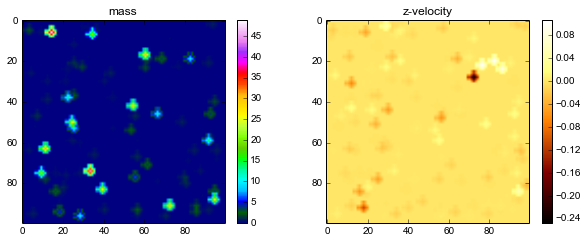

In [12]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure(1); plt.subplot(221); plt.title("mass")
plt.imshow(rslt[0].astype(numpy.float), cmap=plt.cm.gist_ncar)
plt.colorbar(); plt.subplot(222); plt.title("z-velocity")
plt.imshow(rslt[1].astype(numpy.float), cmap=plt.cm.afmhot)
plt.colorbar()
sim.stop()

## What else?

The following enumeration shows some additional features that are offered by SelectScript. Temporal variables hold data for a certain period of time and enable temporal queries, such as since when is something true. Callbacks can be defined if the result of a query changes over time. Every time the result changes the callback gets fired with the result of the query as input parameter. Statements can be nested and additional elements next to help are for example if-else statements, print that enables some kind of logging, and of course an internal evaluation mechanism.

* Temporal variables ...
* Callbacks ...
* Nesting ...
* ```if```, ```else```, ```print```, ```eval```, ...

# Next Evolutional Step -> Reasoning

Did you ever tried to solve a reasoning problem such as the Towers of Hanoi, the Four Color Map, etc. with SQL? Probably not, although the syntax offers some interesting features that we integrated into our language (or in other words abused) in order to support different kinds of search strategies. Thus reasoning with `SELECT` statements is actually pretty easy and by using SelectScript you do not have to cross the border, as mentioned earlier it allows mixing different paradigms.

<center>
    <img src="res/towers_of_hanoi.png" alt="Towers of Hanoi" style="width: 600px;"/>
</center>

The following code snippet is everything that is required to be implemented in Python, to solve the Towers of Hanoi with the help of SelectScript. The move function has two input parameters (2 lists). `towers` is a list of lists that defines the configuration disks and `step` is another list (with two elements), whereby `step[0]` defines from which tower the highest disk should be taken and `step[1]` on which tower it should be placed. If everything was okay, a new tower configuration is returned, otherwise an empty list. The last command attaches this Python function to the interpreter, which is quite similar to attaching a variable. In this case we are using the pure SelectSript interpreter.

In [13]:
import SelectScript, SelectScript.Interpreter

def move(step, towers) :
    if not towers or not towers [step[0]]: pass
    elif not towers[step [1]] or towers [step[1]][-1] > towers[step[0]][-1]:
        # append element on top from another tower top
        towers [step[1]].append(towers[step[0]].pop())
        return towers
    return []

ss = SelectScript.Interpreter()
ss.addFunction("move", move)

The following example shows a vanilla approach to solve this problem. Thereby the search problem is translated into large "table" with all possible combinations of moves, that are defined by the `FROM` expression. Searching this way is actually not very efficient and furthermore not very attractive. It further requires additional knowledge about the number of steps that are required. (It can be calculated by: $2^{disks}-1$)

In [14]:
expr = """ # vanilla approach (approx. 10 sec)
moves = [[0,1], [0,2], [1,0], [1,2], [2,0], [2,1]];

SELECT m1.this,  m2.this,  m3.this,  m4.this,  m5.this,  m6.this,  m7.this
FROM   m1=moves, m2=moves, m3=moves, m4=moves, m5=moves, m6=moves, m7=moves
WHERE  [[],[],[3 ,2 ,1]] == move(m7.this,
                                 move(m6.this,
                                      move(m5.this,
                                           move(m4.this,
                                                move(m3.this,
                                                     move(m2.this,
                                                          move(m1.this, [[3,2,1],[],[]] )))))))
AS list; """
ir = SelectScript.compile( expr )
ss.eval( ir )

[[0, 2], [0, 1], [2, 1], [0, 2], [1, 0], [1, 2], [0, 2]]

## Introducing Recursive Queries

Attaching recursion to the language allows us to identify results more efficient, whereby the SELECT is still used to define what values are request and the WHERE expression defines the goal. The additional elements `START WITH` allows to define start parameters, `CONNECT BY` defines which values are actually affected by the recursion and `STOP WITH` defines stop conditions for the search algorithms. At the beginning we were searching for an "ideal" search strategy that can be applied in background to resolve the query, but then we realized that it is possible and even more valuable to use different ones. Let the user choose the appropriate search strategy for his/her problem. That is why different keywords can be attached to the `CONNECT BY` statement, each of them starts a different kind of search algorithm or defines some optimization strategies. These are demonstrated within the following examples.

```
SELECT ... FROM ... WHERE ...

START WITH value = ... , ...
CONNECT BY ( NO CYCLE | UNIQUE | MEMORIZE int |
                                 MAXIMUM  int )
           value = func(value, ...), ...
STOP WITH  value > ... OR value ...
```

The code below is only used to define a new IPython macro, which is used within the following to measure the execution time of a Python code snippet and returns its result.

In [15]:
import time
def macro_TimeIt(self, line):
    t = time.time()
    rslt = eval(line)
    print "TimeIt: %f sec." %(time.time()-t)
    return rslt

ip = get_ipython()
ip.define_magic("TimeIt", macro_TimeIt)

The following SelectScript shows the basic recursion in action. Iterative deepening is the default search strategy applied. The `SELECT`, `FROM`, `WHERE` expressions are pretty straight forward. As start parameters two values are defined, the initial tower configuration and an addition `level`. New towers are created recursively by executing the `CONNECT BY` expression and the level is increased additionally. The `level` variable defines an additional stop parameter since 7 steps are sufficient to fulfill the task (and to prevent the algorithm from following an infinite path), longer stop parameters result in multiple solutions with longer step sequences.

In [16]:
expr = """ # basic hierarchical query ...
SELECT this FROM moves
WHERE [[],[],[3 ,2 ,1]] == move(this, tower)

START WITH tower = [[3 ,2 ,1],[] ,[]], level = 1
CONNECT BY tower = move(this, tower),  level = level +1
STOP WITH level == 7 or [] == move(this, tower)

AS list;"""

ir = SelectScript.compile( expr )
%TimeIt ss.eval( ir )

TimeIt: 0.749904 sec.


[[[0, 2], [0, 1], [2, 1], [0, 2], [1, 0], [1, 2], [0, 2]]]

Tweaking the script by additional parameters such as `NO CYCLE` results in an empty list. If you take a look at the previous result, steps have to be repeated in order to accomplish the task. To make an SELECT expression more "unique" we have to add an additional value such as the level or the current tower.

In [17]:
expr = """ # no cycles query ...
SELECT level, this FROM moves
WHERE [[],[],[3 ,2 ,1]] == move(this, tower)

START WITH tower = [[3 ,2 ,1],[] ,[]], level = 1
CONNECT BY NO CYCLE
           tower = move(this, tower),  level = level +1
STOP WITH level == 7 or [] == move(this, tower)

AS list;"""

ir = SelectScript.compile( expr )
%TimeIt ss.eval( ir )

TimeIt: 0.750561 sec.


[[1, [0, 2], 2, [0, 1], 3, [2, 1], 4, [0, 2], 5, [1, 0], 6, [1, 2], 7, [0, 2]]]

The keyword `UNIQUE` runs another optimization. It allows that a result appears only once within the search, it thus reduces the search space but requires more "specific" results. The function `to` is a build-in function that can be used to change the id of a dictionary (used for formatting purposes). `str` is only attached to be used as an additional helper and thus to simplify the SelectScript code.

In [18]:
ss.addFunction("str", str) # attach additional helper
expr = """ # unique results only ...
SELECT to(this, "step"+str(level)), tower FROM moves
WHERE [[],[],[3 ,2 ,1]] == move(this, tower)

START WITH tower = [[3 ,2 ,1],[] ,[]], level = 1
CONNECT BY UNIQUE
           tower = move(this, tower),  level = level +1
STOP WITH level == 7 or [] == move(this, tower)

AS dict;"""

ir = SelectScript.compile( expr )
%TimeIt ss.eval( ir )

TimeIt: 0.165714 sec.


[[{u'step1': [0, 2], u'tower': [[3, 2], [], [1]]},
  {u'step2': [0, 1], u'tower': [[3], [2], [1]]},
  {u'step3': [2, 1], u'tower': [[3], [2, 1], []]},
  {u'step4': [0, 2], u'tower': [[], [2, 1], [3]]},
  {u'step5': [1, 0], u'tower': [[1], [2], [3]]},
  {u'step6': [1, 2], u'tower': [[1], [], [3, 2]]},
  {u'step7': [0, 2], u'tower': [[], [], [3, 2, 1]]}]]

The keyword `MEMORIZE` does not adapt the search strategy, instead it applies another in background. The problem is thereby really transformed into a directed graph by using the [networkx](http://github.com/networkx) library. And to speed-up the search, we had implemented our own bidirectional graph search algorithm, see:
http://www.aizac.info/bi-graph-search-benchmark

In [19]:
expr = """ # bidiectional graph search
SELECT this, tower FROM moves WHERE [[],[],[4,3,2,1]] == move(this, tower)

START WITH tower = [[4,3,2,1],[],[]]
CONNECT BY MEMORIZE 15
           tower = move(this, tower)
STOP WITH  [] == move(this, tower)

AS list;"""

ir = SelectScript.compile( expr )
%TimeIt ss.eval( ir )

TimeIt: 0.172579 sec.


[[[[0, 1], [[4, 3, 2], [1], []]],
  [[0, 2], [[4, 3], [1], [2]]],
  [[1, 2], [[4, 3], [], [2, 1]]],
  [[0, 1], [[4], [3], [2, 1]]],
  [[2, 0], [[4, 1], [3], [2]]],
  [[2, 1], [[4, 1], [3, 2], []]],
  [[0, 1], [[4], [3, 2, 1], []]],
  [[0, 2], [[], [3, 2, 1], [4]]],
  [[1, 2], [[], [3, 2], [4, 1]]],
  [[1, 0], [[2], [3], [4, 1]]],
  [[2, 0], [[2, 1], [3], [4]]],
  [[1, 2], [[2, 1], [], [4, 3]]],
  [[0, 1], [[2], [1], [4, 3]]],
  [[0, 2], [[], [1], [4, 3, 2]]],
  [[1, 2], [[], [], [4, 3, 2, 1]]]]]

## Reasoning in OpenRAVE

To demonstrate, that this approach can also cope with more complex problems, we have prepared the following OpenRAVE simulation. One robot in an "industrial" environment that has to find a trajectory to a certain target position. Thereby, the environment defines all side conditions, so that we do not have to explicitly describe them.

In [20]:
import SelectScript, SelectScript_OpenRAVE.Interpreter
from openravepy import *
# load OpenRAVE
env=Environment()
env.Load('res/scene.env.xml')
env.SetViewer('qtcoin')
# load the SelectScript interpreter and attach env
ssRave = SelectScript_OpenRAVE.Interpreter()
ssRave.addEnvironment(env)
#############################################################
# helper only, to draw lines ...
graphix = []
def draw_line(line, lwd=16, color=[(1, 0, 0), (1, 0, 0)]):
    global graphix, env
    graphix.append(env.drawlinestrip(points=numpy.array(line),
                   linewidth=lwd, colors=numpy.array(color)))
draw_line([( 9.5, 7.5, 0), (10.5, 8.5, 0)])
draw_line([( 9.5, 8.5, 0), (10.5, 7.5, 0)])
draw_line([(10.0, 8.0, 0), (10.0, 8.0, 3)])

<img src="res/OpenRAVE.png" />

### Additional helpers ...

But before we start, let us implement two additional helpers that are afterwards used within the script. The first (as the name says) is only used to open a sound file and to play it. With the second function we actually replace the standard `+` operator so that it is possible to add  lists, as if they were vectors. The original function is only able to add numbers and floats.

In [21]:
from pygame import mixer
mixer.init()
def playSound(file): 
    mixer.Sound(file).play()

def list_add(a,b):
    if isinstance(a, list):
        rslt = []
        for i in range(len(a)):
            rslt.append(a[i] + b[i])
        return rslt
    return a + b

ssRave.addFunction('playSound', playSound)
ssRave.addFunction('add', list_add)

### The Script ...

The following script actually mirrors the previous ones, whereby the configuration of the tower has been replaced by the configuration of the virtual industrial environment. We start up with a basic initialization, such as the robot's identifier, the start and target positions, as well as the directions, the robot is allowed to move. Thus, the begin of the `SELECT` statement does not provide really new features, except that we use the additional option MAXIMUM for the first time. It defines the maximum amount of results to be generated. The variable 'level' is used to minimize the search by defining an additional stop condition; stop if the target cannot be reached anymore with the remaining amount of steps.

A new element, that has only been mentioned so far, is the `IF` expression, whereby it is only used to play a sound if the robot collides with something in the environment. It still returns true or false depending on, if a collision has occurred or not. This is actually an additional stop condition, but we highlight it with an `"sound"`. All identified paths are returned as lists and stored within the Python variable `paths`. Because we are using a bidirectional search algorithm, all results are returned ordered by their length, starting with the shortest ones.

In [22]:
expr = """
robot      = "YouBot";
start_pos  = position(robot,0,2);
target_pos = [10.0, 8.0];
directions = [[0,1],[0,-1],[1,-1],[-1,-1],[1,0],[-1,0],[-1,1],[1,1]];

SELECT (this + cur_pos) FROM directions
WHERE target_pos == move(robot, this+cur_pos)

START WITH cur_pos=start_pos, level = 1
CONNECT BY MEMORIZE 25 MAXIMUM 1000
           cur_pos = move(robot, cur_pos+this),
           level = level + 1
STOP WITH  target_pos == move(robot, this+cur_pos) OR
           distance(target_pos, this+cur_pos) > 0.5*(25-level) OR
           IF( checkCollision(robot);
               playSound("/usr/share/sounds/ubuntu/stereo/bell.ogg"),
               True) # ; else is not required here ...
AS list; """ 
task  = SelectScript.compile(expr)
paths = ssRave.eval( task )

In [23]:
# switch of the robot's yellow traces...
env.GetSensor("YouBot_trace").Configure(Sensor.ConfigureCommand.PowerOff)
env.GetSensor("YouBot_trace").Configure(Sensor.ConfigureCommand.RenderDataOff)

0

... and the following lines only iterate through all results and draw them within the simulated environment ...

In [24]:
import time

for i, path in enumerate(paths):
    color = (numpy.random.uniform(), numpy.random.uniform(), numpy.random.uniform())
    plist = [(3, 9, 0.002 * i)]
    clist = [color]

    for point in path:
        plist.append((point[0][0], point[0][1], 0.002*i))
        clist.append(color)
        draw_line(plist, 3, clist)
    time.sleep(0.01)

<img src="res/OpenRAVE_result.png" />

### Or simply ...

Of course, there are plenty of other algorithms that solve the same problem more effective, but this was only to demonstrate the idea behind the approach... SelectScript is open for further extensions and with some of the filters, that can be downloaded at https://gitlab.com/OvGU-ESS/OpenRAVE-Plugins, it is also possible to query for an occupancy grid representation and use this as an input for another path planning algorithms.

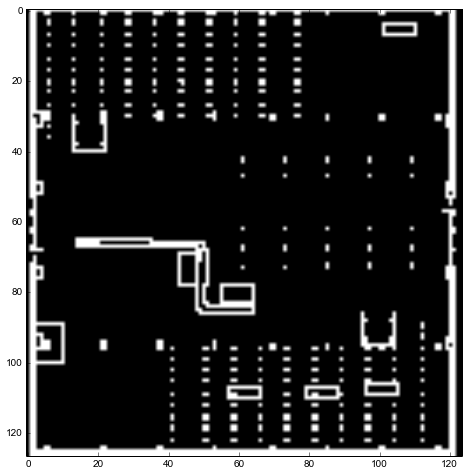

In [25]:
expr = """ SELECT this FROM environment
           WHERE isKinbody(this)
           AS occupancygrid(0.2, 0.2); """
task = SelectScript.compile(expr)
oMap = ssRave.eval( task )
plt.imshow(oMap.astype(numpy.float), cmap=plt.cm.gray)

Switching on the external sensor maintenance camera systems ...

In [26]:
graphix = [] # delete lines drawn
expr = """ cams = SELECT obj FROM environment
                  WHERE isSensor(this) and "cam" in id(this)
                  AS list; """
task = SelectScript.compile(expr)
cams = ssRave.eval( task )
for cam in cams:
    cam.Configure(Sensor.ConfigureCommand.PowerOn)
    cam.Configure(Sensor.ConfigureCommand.RenderDataOn)

<img src="res/OpenRAVE_camera.png" />

... it is also possible to query for a map like representation that could be used in combination with the occupancy grid map, allowing to identify more secure paths ...

In [ ]:
expr = """ SELECT obj(o.this), obj(s.this)
           FROM o=environment, s=environment
           WHERE isSensor(s.this) AND 
                 isKinbody(o.this) OR isRobot(o.this)
           AS sensorgrid(zPos=0.2, gridSize=1);"""
task = SelectScript.compile(expr)
sMap = ssRave.eval( task )
plt.imshow(sMap.astype(numpy.float), cmap=plt.cm.hot)

# Future Work

So what comes next? Of course, we are trying to optimize the language and its execution, try to parallelize the evaluation of scripts, and we also started to integrate it into other languages. But there are two possible scenarios we believe declaration could be pretty useful in the future.

At first it could be used as some kind of lingua franca between robots with different kind of world models and internal environment representations. But it would require a standardized nomenclature for functions and return formats...

<center>
    <img src="res/communication.png"/>
</center>

The second and most obvious scenario deals with the programming of robotic applications itself. Nowadays there are large libraries, a whole bunch of functionality available for free. For example ROS, which comprises more than 2000 different packages with any kind of thinkable functionality, encapsulated by configurable nodes that offer "simple" data transformation via an input output system. Based on the available sensor systems, available actuators, the predicted environment, the intended tasks, ... we search for packages/nodes and try to combine them in a way that at least the task within the current setup can be accomplished. Cynically it can be said that we are still doing assembly, although we are dealing with different kinds of abstract data and functions rather than with memory addresses and instructions.


Why not start developing declarative methods and try to describe the functionality of ROS nodes in a way that we can reason about them, we know what is there [2,3] and we have a syntax to express request for the information we require. So it should be possible to reason about transformations, filters, fusions, etc. in a way as we reason about ordinary robotic action sequences...

<center>
    <img src="res/ros.org.png"/>
</center>

| Contact   | André Dietrich                            |
| ----------| ----------------------------------------- |
| Email     | <mailto:dietrich@ivs.cs.uni-magdeburg.de> |
| Web       | http://eos.cs.ovgu.de/crew/dietrich       |
| Downloads | https://gitlab.com/groups/OvGU-ESS        |

## Literature

[1] [* SelectScript: A Query Language for Robotic World Models and Simulations *](http://eos.cs.ovgu.de/wp-content/uploads/2015/06/SelectScript-A-Query-Language-for-Robotic-World-Models-and-Simulations.pdf "download")

[2] [* Distributed Management and Representation of Data and Context in Robotic Applications *](http://wwwiti.cs.uni-magdeburg.de/iti_db/publikationen/ps/auto/DZMK14.pdf "download")

[3] [* ROS Meets Cassandra: Data Management in Smart Environments with NoSQL *](http://eos.cs.ovgu.de/wp-content/uploads/2014/09/ROS-Meets-Cassandra-Data-Management-in-Smart-Environments-with-NoSQL.pdf "download")

[4] [* Application Driven Environment Representation *](http://www.thinkmind.org/download.php?articleid=ubicomm_2013_6_10_10092 "download")